2.1

In [2]:
import numpy as np

def estimate_pi(N):
    x = np.random.uniform(-1, 1, size=N)
    y = np.random.uniform(-1, 1, size=N)

    distances_sq = x**2 + y**2

    inside = distances_sq <= 1
    count_inside = np.sum(inside)

    pi_est = 4 * count_inside / N
    return pi_est

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Ns = [10**k for k in range(1, 7)]
pi_estimates = [estimate_pi(N) for N in Ns]

true_pi = np.pi
errors = [abs(est - true_pi) / true_pi * 100 for est in pi_estimates]


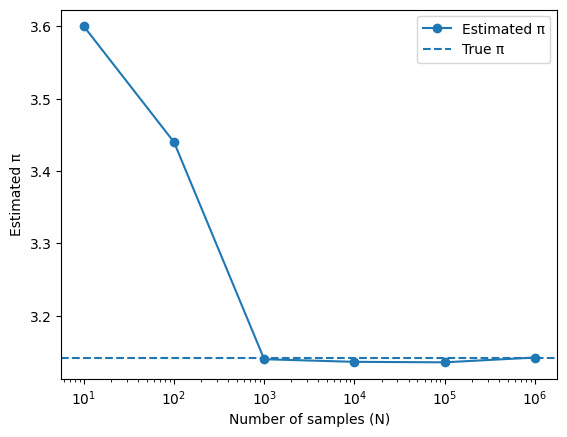

In [4]:
plt.figure()
plt.xscale("log")
plt.plot(Ns, pi_estimates, marker='o', label="Estimated π")
plt.axhline(np.pi, linestyle='--', label="True π")
plt.xlabel("Number of samples (N)")
plt.ylabel("Estimated π")
plt.legend()
plt.show()


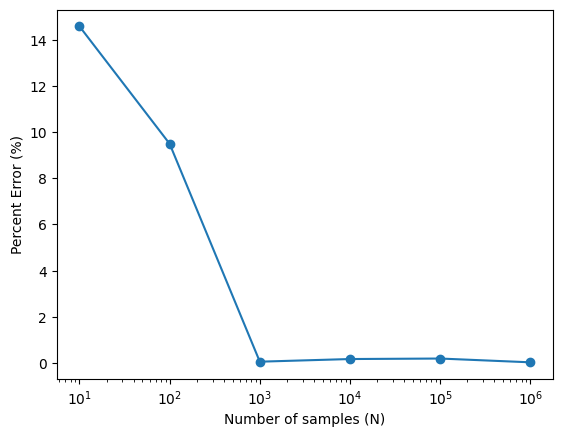

In [5]:
plt.figure()
plt.xscale("log")
plt.plot(Ns, errors, marker='o')
plt.xlabel("Number of samples (N)")
plt.ylabel("Percent Error (%)")
plt.show()


2.2

In [6]:

def estimate_e_integral(N, t=2):
    x = np.random.uniform(1, t, size=N)
    y = np.random.uniform(0, 1, size=N)

    inside = y < (1 / x)
    area = (t - 1) * np.sum(inside) / N

    e_est = t ** (1 / area)
    return e_est


In [7]:
e_est = estimate_e_integral(1_000_000, t=2)
error = abs(e_est - np.e) / np.e * 100
print(e_est, error)


2.7209728579073142 0.09899744096051517


In [8]:
def estimate_e_numpy(num_trials, max_steps=20):
    u = np.random.rand(num_trials, max_steps)
    decreasing = np.diff(u, axis=1) < 0
    stop_idx = np.argmax(~decreasing, axis=1) + 1
    return stop_idx.mean()
N=int(input("Enter an iteger:"))
mean=estimate_e_numpy(N)
print(mean) #tested with N=10000

1.6998


2.3

In [9]:

def run_simulation(predicate_func, bounds, N):
    x_min, x_max, y_min, y_max = bounds

    x = np.random.uniform(x_min, x_max, size=N)
    y = np.random.uniform(y_min, y_max, size=N)

    inside = predicate_func(x, y)
    area_box = (x_max - x_min) * (y_max - y_min)

    return area_box * np.sum(inside) / N


In [10]:
def is_in_circle(x, y):
    return x**2 + y**2 <= 1

pi_est = run_simulation(is_in_circle, [-1, 1, -1, 1], 1_000_000)
print(pi_est)


3.143984


In [11]:
def under_parabola(x, y):
    return y <= x**2

area_parabola = run_simulation(under_parabola, [0, 1, 0, 1], 1_000_000)
print(area_parabola)


0.333331


In [12]:
def under_gaussian(x, y):
    return y <= np.exp(-x**2)

area_gauss = run_simulation(under_gaussian, [0, 2, 0, 1], 1_000_000)
print(area_gauss)


0.882554


In [13]:
#for comparison
from scipy.special import erf
true_val = np.sqrt(np.pi) * erf(2)
print(true_val)


1.764162781524843
